# Case Study: Exploratory Data Analysis of Employee Attrition

## Data Preparation & Cleaning 

In [1]:
## Import required libraries and setup global settings

# Data manipulation
import pandas as pd
import numpy as np
from skimpy import clean_columns

# Data visualization 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib import rcParams
import seaborn as sns
from pywaffle import Waffle

# Configure global styling
bg_color = "#f9f9f9"
title_color = "#474747"
text_color = "#787878"

plt.style.use("seaborn-v0_8-white")
rcParams['figure.facecolor'] = bg_color # figure background color
rcParams['font.family'] = 'sans-serif'
rcParams['axes.facecolor'] = bg_color # ax background color
rcParams['axes.edgecolor'] = '#474747' # spine color

In [2]:
## Load data file
df = pd.read_csv('../data/raw/attrition-data.csv') 

## Read data
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [3]:
# Get general information on the data structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [4]:
# Get statistical information on numerical variables
df.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


### Clean Column Names

In [5]:
df = clean_columns(df, case = "title")
df.head()

9 column names have been cleaned

,Age,Attrition,Department,Distance From Home,Education,Education Field,Environment Satisfaction,Job Satisfaction,Marital Status,Monthly Income,Num Companies Worked,Work Life Balance,Years At Company
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


### Check for Duplicates

In [6]:
duplicate_rows = len(df[df.duplicated()])
duplicate_rows

0

## Data Exploration and Visualizations

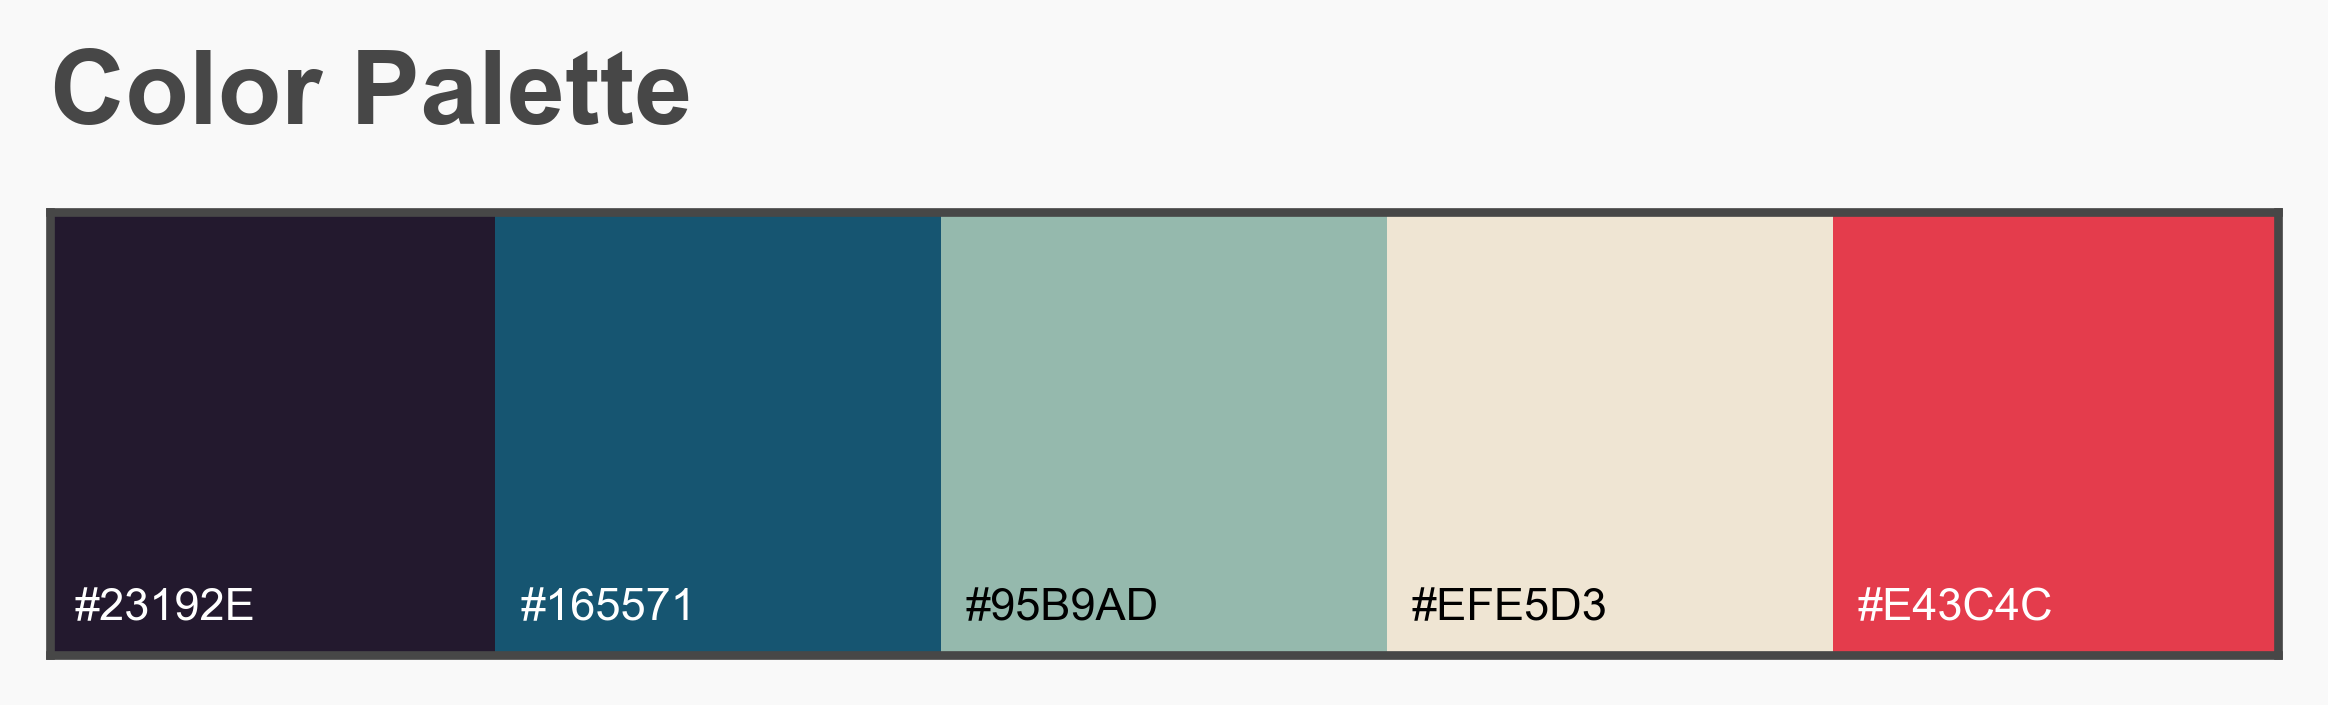

In [7]:
plt.rcParams['figure.figsize'] = (12,  6)
plt.rcParams['figure.dpi'] = 500
colors = ["#23192E", "#165571", "#95B9AD", "#EFE5D3", "#E43C4C"]
sns.palplot(colors,1.15)

# Title
title_color = "#474747"
plt.text(-0.5,-0.70,"Color Palette", fontweight="bold", fontsize=15, color=title_color)

# Color hex code
for i, color in enumerate(colors):
    if i == 0 or i == 1 or i == 4:
        plt.text(-0.445 + i, 0.42, colors[i], color="white", fontsize=6.5)
    else:
        plt.text(-0.445 + i, 0.42, colors[i], color="black", fontsize=6.5)

plt.show()

### Distribution of Categorical Features 

In [8]:
df_cat = df.iloc[:,[1,2,4,5,6,7,8,11]]
df_cat.head()

,Attrition,Department,Education,Education Field,Environment Satisfaction,Job Satisfaction,Marital Status,Work Life Balance
0,Yes,Sales,2,Life Sciences,2,4,Single,1
1,No,Research & Development,1,Life Sciences,3,2,Married,3
2,Yes,Research & Development,2,Other,4,3,Single,3
3,No,Research & Development,4,Life Sciences,4,3,Married,3
4,No,Research & Development,1,Medical,1,2,Married,3


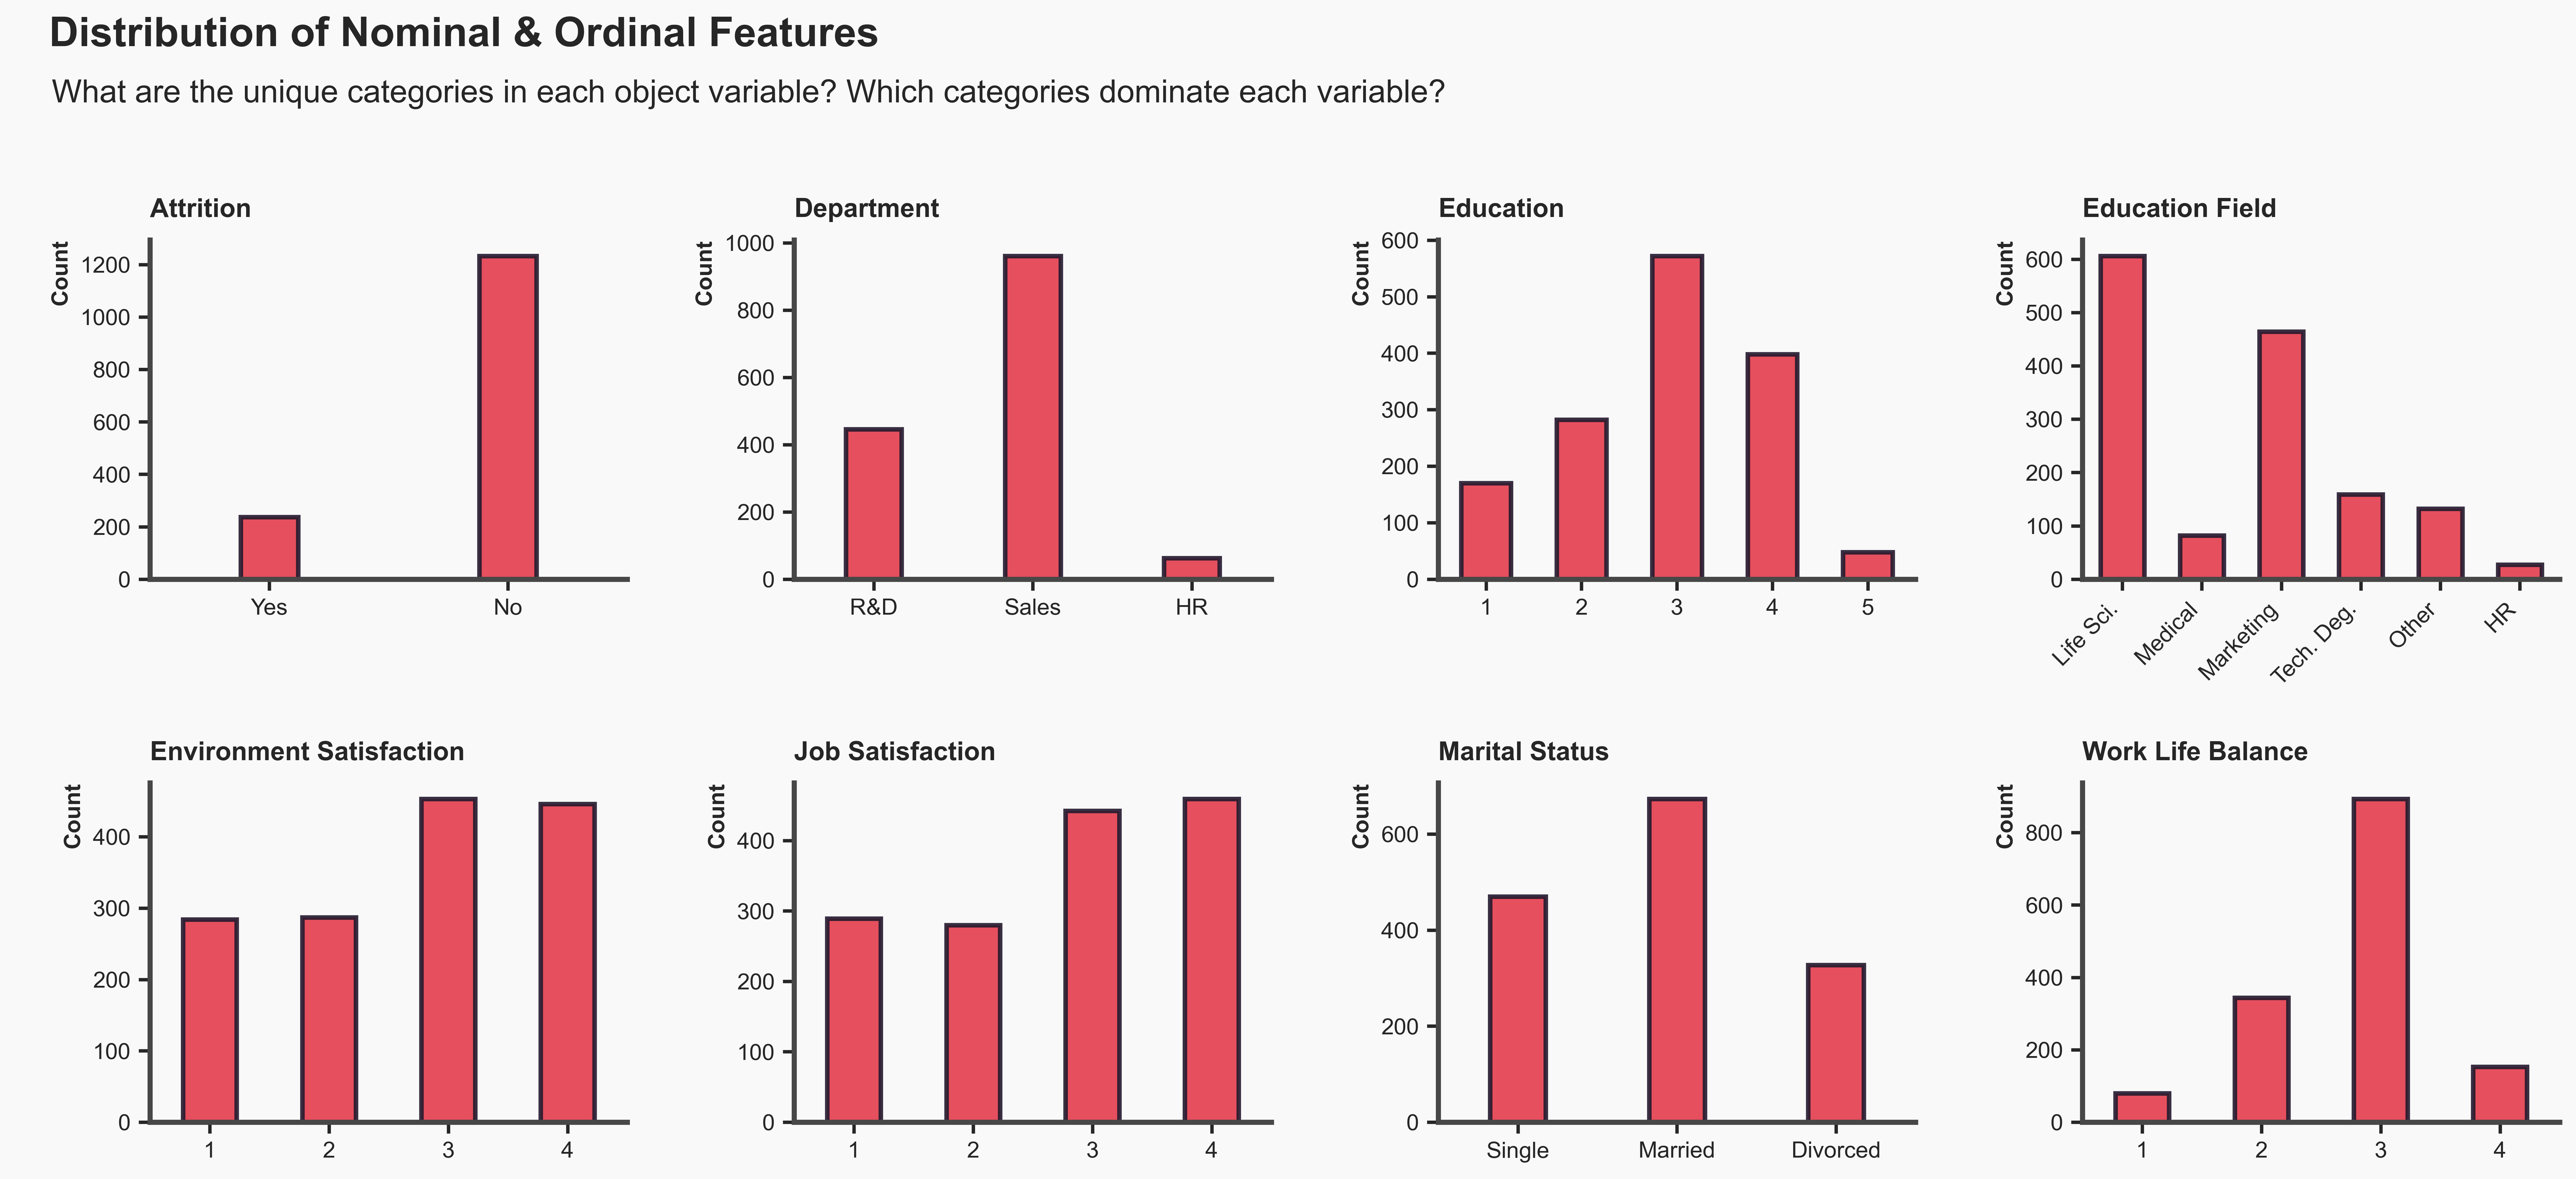

In [9]:
fig = plt.figure(figsize=(19,7), dpi=550)
gs = fig.add_gridspec(2, 4)
gs.update(wspace=0.35, hspace=0.6)
ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])
ax2 = fig.add_subplot(gs[2])
ax3 = fig.add_subplot(gs[3])
ax4 = fig.add_subplot(gs[4])
ax5 = fig.add_subplot(gs[5])
ax6 = fig.add_subplot(gs[6])
ax7 = fig.add_subplot(gs[7])

# Create custom plotting function
def plot_cat_features(df, ax, col_name, width):
    sns.countplot(data=df,
                  ax=ax,
                  x=col_name,
                  orient="h",
                  width=width,
                  #order = df[col_name].value_counts().index, # Sort by highest first
                  palette = ["#E43C4C"],
                  alpha = 0.9,
                  saturation=1,
                  edgecolor = "#23192E",
                  linewidth = 2
                  ) 

    # Set tick properties
    ax.tick_params(axis='both', which='both',length=5, width=1.5)
    
    # Set spine properties
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    for axis in ['left','bottom']:
        ax.spines[axis].set_linewidth(2.25)

    # Remove axis labels
    ax.set(xlabel=None)

    ax.set_ylabel("Count",
                  loc="top",
                  fontweight="semibold")

    # Set ax title
    ax.set_title(label=col_name,
                 loc="left",
                 pad=10,
                 fontsize=11.5,
                 fontweight="semibold")

column_names = df_cat.columns # get column names
axes = fig.get_axes() # get each ax as a list
width = [0.24, 0.35, 0.52, 0.55, 0.45, 0.45, 0.35, 0.45] # set bar width

for i in range(8):
    plot_cat_features(df_cat, axes[i], column_names[i], width[i])

ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')

# Override existing tick labels
ax1.set_xticklabels(['R&D','Sales','HR'])
ax3.set_xticklabels(['Life Sci.', 'Medical', 'Marketing', 'Tech. Deg.', 'Other', 'HR'])

# Title
fig.suptitle('Distribution of Nominal & Ordinal Features', 
             x=0.226, 
             y= 1.075, 
             fontsize=18,
             fontweight="bold")

# Description
fig.text(0.082, 0.97,  
	'''
    What are the unique categories in each object variable? Which categories dominate each variable?
    ''',
	fontsize=14, fontweight='light')

plt.show()


### Distribution of Continuous Features

In [10]:
df_int = df.iloc[:,[0,3,9,10,12]]
df_int.head()

,Age,Distance From Home,Monthly Income,Num Companies Worked,Years At Company
0,41,1,5993,8,6
1,49,8,5130,1,10
2,37,2,2090,6,0
3,33,3,2909,1,8
4,27,2,3468,9,2


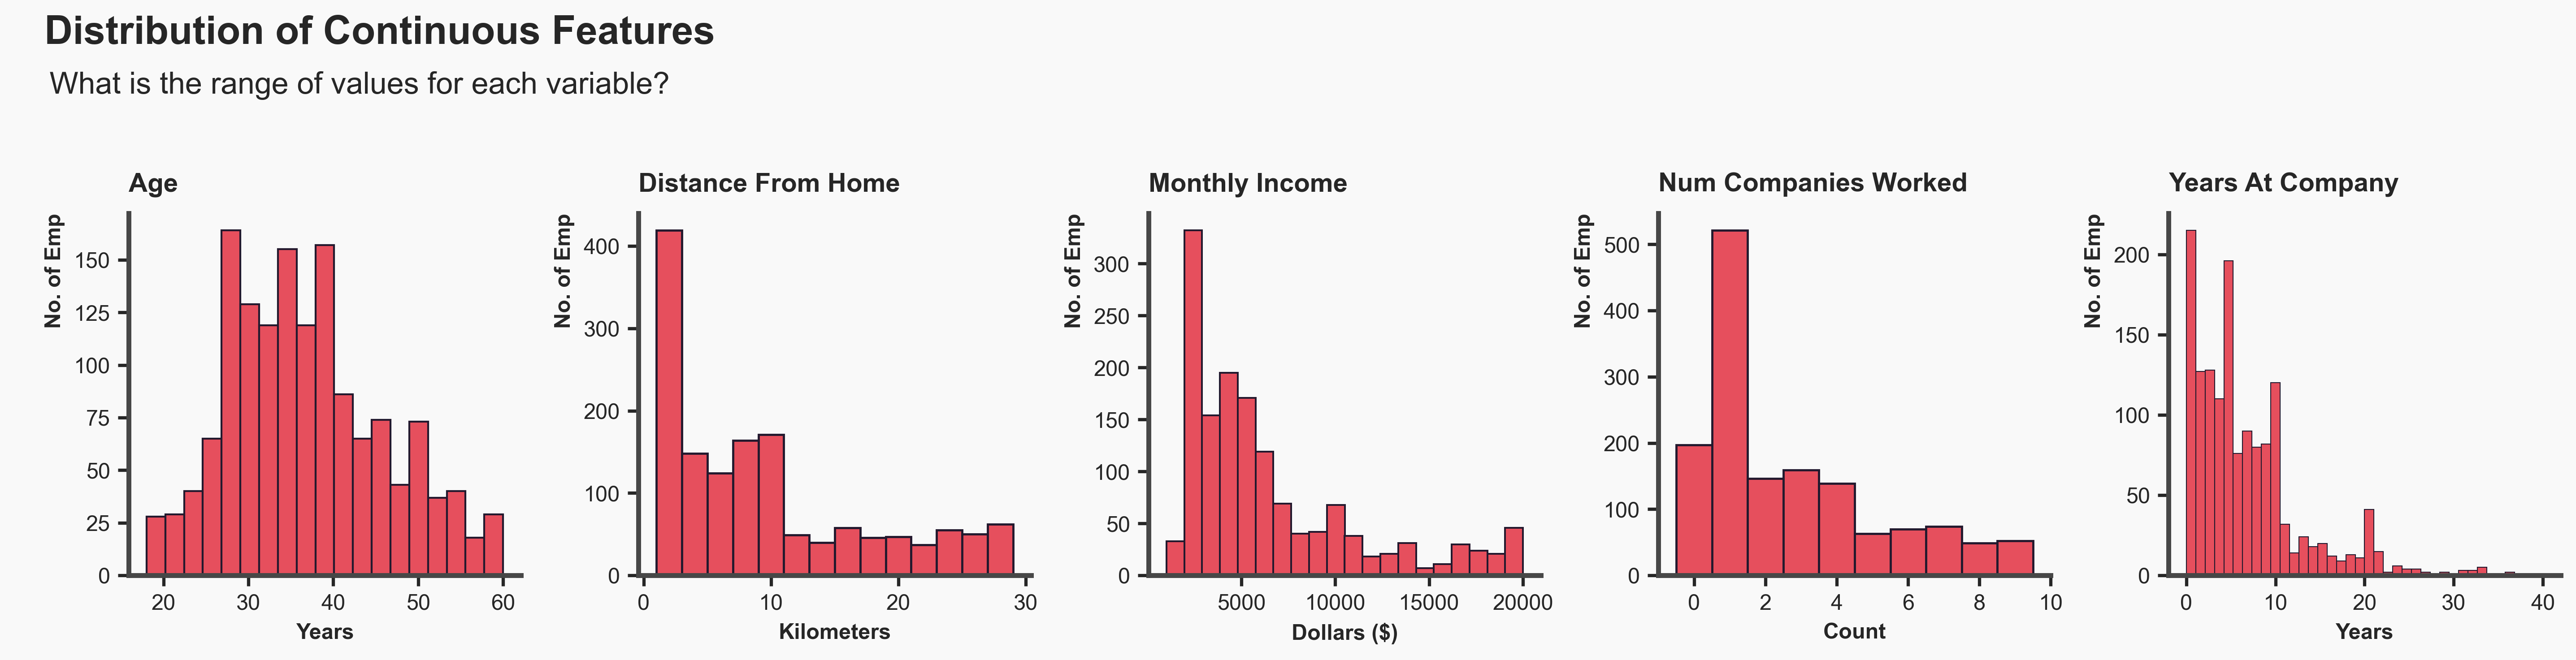

In [11]:
fig = plt.figure(figsize=(20,3), dpi=350)
gs = fig.add_gridspec(1, 5)
gs.update(wspace=0.3, hspace=0.5)
ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])
ax2 = fig.add_subplot(gs[2])
ax3 = fig.add_subplot(gs[3])
ax4 = fig.add_subplot(gs[4])

# Create custom plotting function
def plot_int_features(df, ax, col_name, discrete, x_label):
    sns.histplot(data=df,
                ax=ax,
                x=col_name,
                color = "#E43C4C",
                discrete=discrete,
                alpha = 0.9,
                edgecolor = "#23192E"
                ) 

    # Set tick properties
    ax.tick_params(axis='both', which='both',length=5, width=1.5)
    
    # Set spine properties
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    for axis in ['left','bottom']:
        ax.spines[axis].set_linewidth(2.25)

    # Remove axis labels
    ax.set(xlabel=None)

    # Set ax title
    ax.set_title(label=col_name,
                 loc="left",
                 pad=10,
                 fontsize=12,
                 fontweight="semibold")
    ax.set_ylabel("No. of Emp",
                  loc="top",
                  fontweight="semibold")
    
    ax.set_xlabel(x_label, loc="center", fontweight="semibold")

column_names = df_int.columns # get column names
axes = fig.get_axes() # get each ax as a list
discrete = [None, None, None, True, None] # set discrete settings
x_label = ["Years", "Kilometers", "Dollars ($)", "Count", "Years"]

for i in range(5):
    plot_int_features(df_int, axes[i], column_names[i], discrete[i], x_label[i])

# Title
fig.suptitle('Distribution of Continuous Features', 
             x=0.205, 
             y= 1.3, 
             fontsize=18,
             fontweight="bold")

# Description
fig.text(0.089, 1.065,  
	'''
    What is the range of values for each variable?
    ''',
	fontsize=14, fontweight='light')

plt.show()


### Distribution of Continuous Features by Attrition

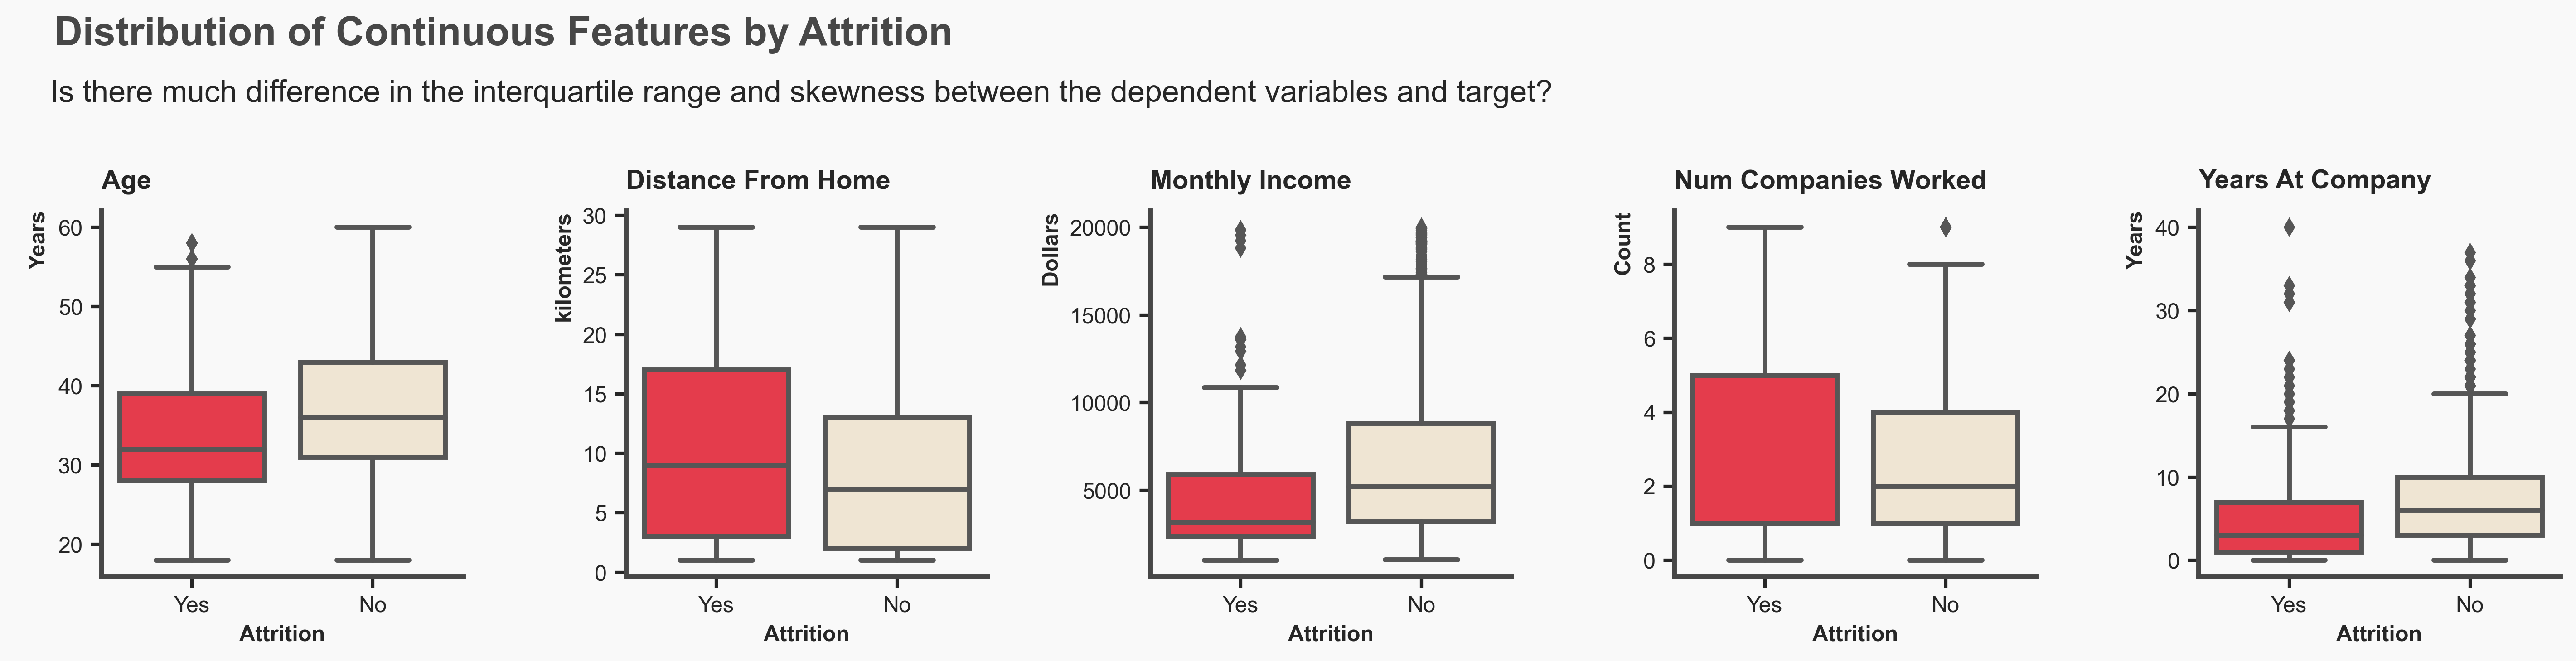

In [12]:
fig = plt.figure(figsize=(20,3), dpi=350)
gs = fig.add_gridspec(1, 5)
gs.update(wspace=0.45, hspace=0.3)
ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])
ax2 = fig.add_subplot(gs[2])
ax3 = fig.add_subplot(gs[3])
ax4 = fig.add_subplot(gs[4])

def boxplot_num_vs_target(df, x, y, y_label, ax):
    sns.boxplot(data=df,
                x=x,
                y=y,
                ax=ax,
                saturation=1,
                linewidth=2.25,
                palette=[colors[4], colors[3]]
                )

    # Set tick properties
    ax.tick_params(axis='both', which='both',length=5, width=1.5)
    
    # Set spine properties
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    for axis in ['left','bottom']:
        ax.spines[axis].set_linewidth(2.25)

    # Remove axis labels
    ax.set(xlabel=None, ylabel=None)

    #ax.set_yticks([])

    # Set ax title
    ax.set_title(label=y,
                 loc="left",
                 pad=10,
                 fontsize=12,
                 fontweight="semibold")
    ax.set_ylabel(y_label, loc="top", fontweight="semibold")
    ax.set_xlabel("Attrition", loc="center", fontweight="semibold")

column_names = df_int.columns # get column names
axes = fig.get_axes() # get each ax as a list
y_label = ["Years", "kilometers", "Dollars", "Count", "Years"]

for i in range(5):
    boxplot_num_vs_target(df=df_int, x=df["Attrition"], y=column_names[i], y_label=y_label[i], ax=axes[i])

# Title
fig.suptitle(t='Distribution of Continuous Features by Attrition', 
             x=0.11,
             y=1.29,
             ha="left",
             fontsize=18,
             fontweight="bold",
             color=title_color)

# Description
fig.text(0.098, 1.04,  
	'''
    Is there much difference in the interquartile range and skewness between the dependent variables and target?
    ''',
	fontsize=14, fontweight='light', ha="left")

plt.show()

### Distribution of Categorical Features by Attrition

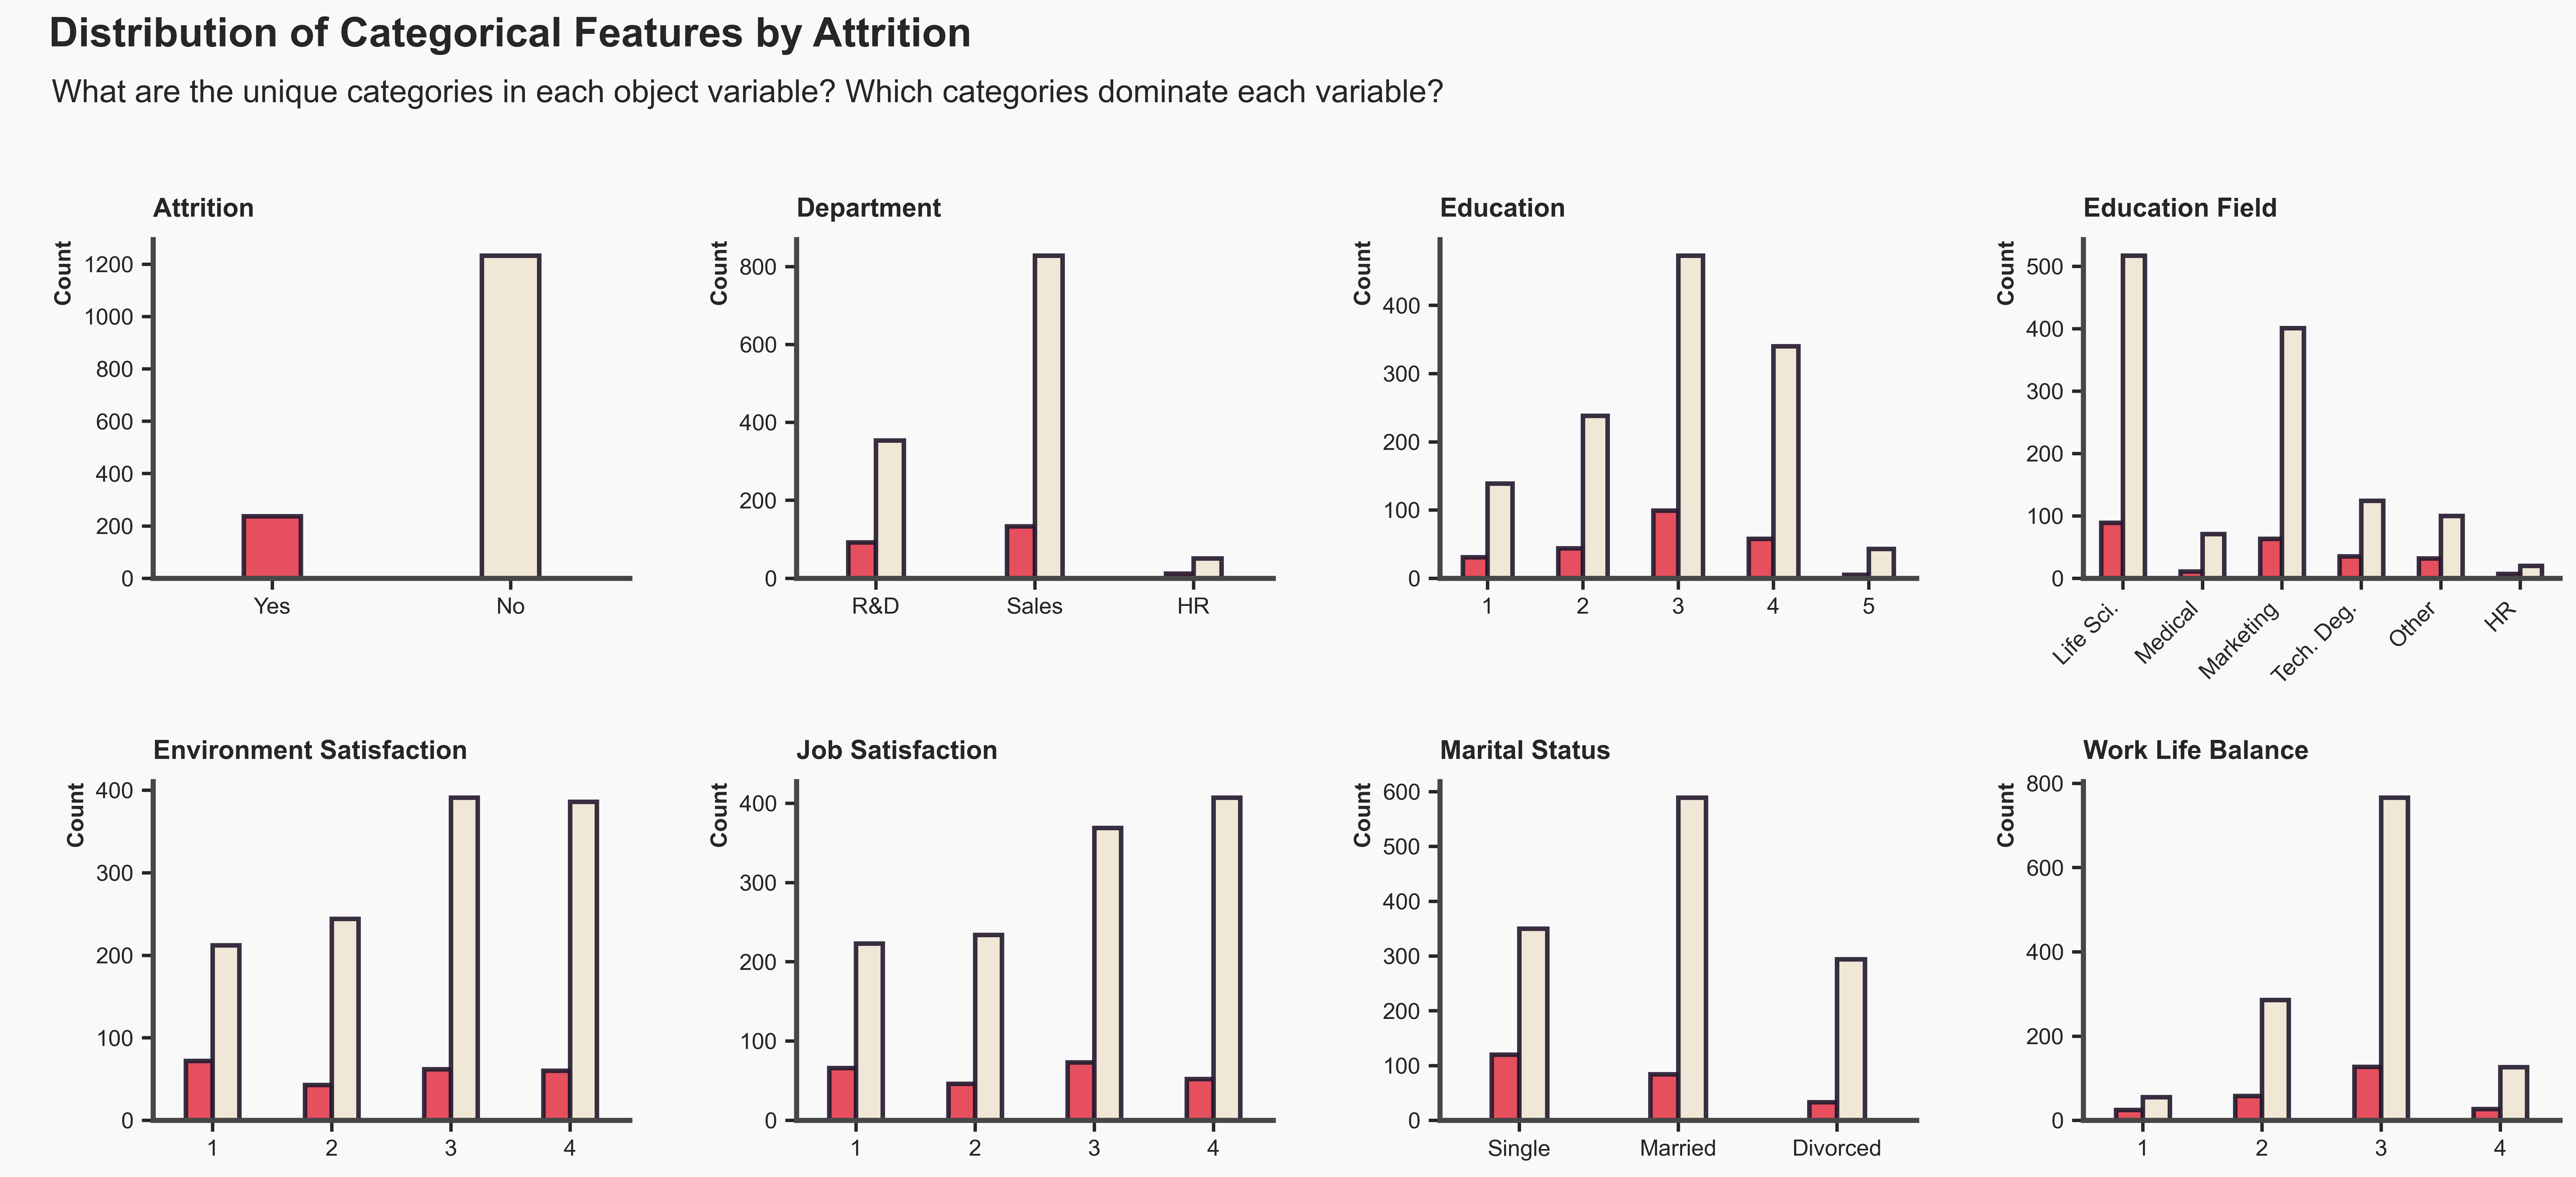

In [13]:
fig = plt.figure(figsize=(19,7), dpi=550)
gs = fig.add_gridspec(2, 4)
gs.update(wspace=0.35, hspace=0.6)
ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])
ax2 = fig.add_subplot(gs[2])
ax3 = fig.add_subplot(gs[3])
ax4 = fig.add_subplot(gs[4])
ax5 = fig.add_subplot(gs[5])
ax6 = fig.add_subplot(gs[6])
ax7 = fig.add_subplot(gs[7])

# Create custom plotting function
def plot_cat_features(df, ax, col_name, width):
    sns.countplot(data=df,
                  ax=ax,
                  x=col_name,
                  orient="h",
                  width=width,
                  #order = df[col_name].value_counts().index, # Sort by highest first
                  palette = ["#E43C4C", colors[3]],
                  alpha = 0.9,
                  saturation=1,
                  edgecolor = "#23192E",
                  linewidth = 2,
                  hue="Attrition"
                  ) 

    # Set tick properties
    ax.tick_params(axis='both', which='both',length=5, width=1.5)
    
    # Set spine properties
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    for axis in ['left','bottom']:
        ax.spines[axis].set_linewidth(2.25)

    # Remove axis labels
    ax.set(xlabel=None)

    ax.set_ylabel("Count",
                  loc="top",
                  fontweight="semibold")

    # Set ax title
    ax.set_title(label=col_name,
                 loc="left",
                 pad=10,
                 fontsize=11.5,
                 fontweight="semibold")

    ax.get_legend().remove()

column_names = df_cat.columns # get column names
axes = fig.get_axes() # get each ax as a list
width = [0.24, 0.35, 0.52, 0.55, 0.45, 0.45, 0.35, 0.45] # set bar width

sns.countplot(data=df,
              ax=ax0,
              x="Attrition",
              width=width[0],
              #order = df[col_name].value_counts().index, # Sort by highest first
              palette = ["#E43C4C", colors[3]],
              alpha = 0.9,
              saturation=1,
              edgecolor = "#23192E",
              linewidth = 2
              ) 
# Set tick properties
ax0.tick_params(axis='both', which='both',length=5, width=1.5)
    
# Set spine properties
for spine in ['top', 'right']:
    ax0.spines[spine].set_visible(False)
for axis in ['left','bottom']:
    ax0.spines[axis].set_linewidth(2.25)

# Remove axis labels
ax0.set(xlabel=None)

ax0.set_ylabel("Count",
                  loc="top",
                  fontweight="semibold")

# Set ax title
ax0.set_title(label="Attrition",
                 loc="left",
                 pad=10,
                 fontsize=11.5,
                 fontweight="semibold")

for i in range(1,8):
    plot_cat_features(df_cat, axes[i], column_names[i], width[i])

ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')

# Override existing tick labels
ax1.set_xticklabels(['R&D','Sales','HR'])
ax3.set_xticklabels(['Life Sci.', 'Medical', 'Marketing', 'Tech. Deg.', 'Other', 'HR'])

# Title
fig.suptitle('Distribution of Categorical Features by Attrition', 
             x=0.24, 
             y= 1.075, 
             fontsize=18,
             fontweight="bold")

# Description
fig.text(0.081, 0.97,  
	'''
    What are the unique categories in each object variable? Which categories dominate each variable?
    ''',
	fontsize=14, fontweight='light')

plt.show()

### Correlation Between Numerical Features

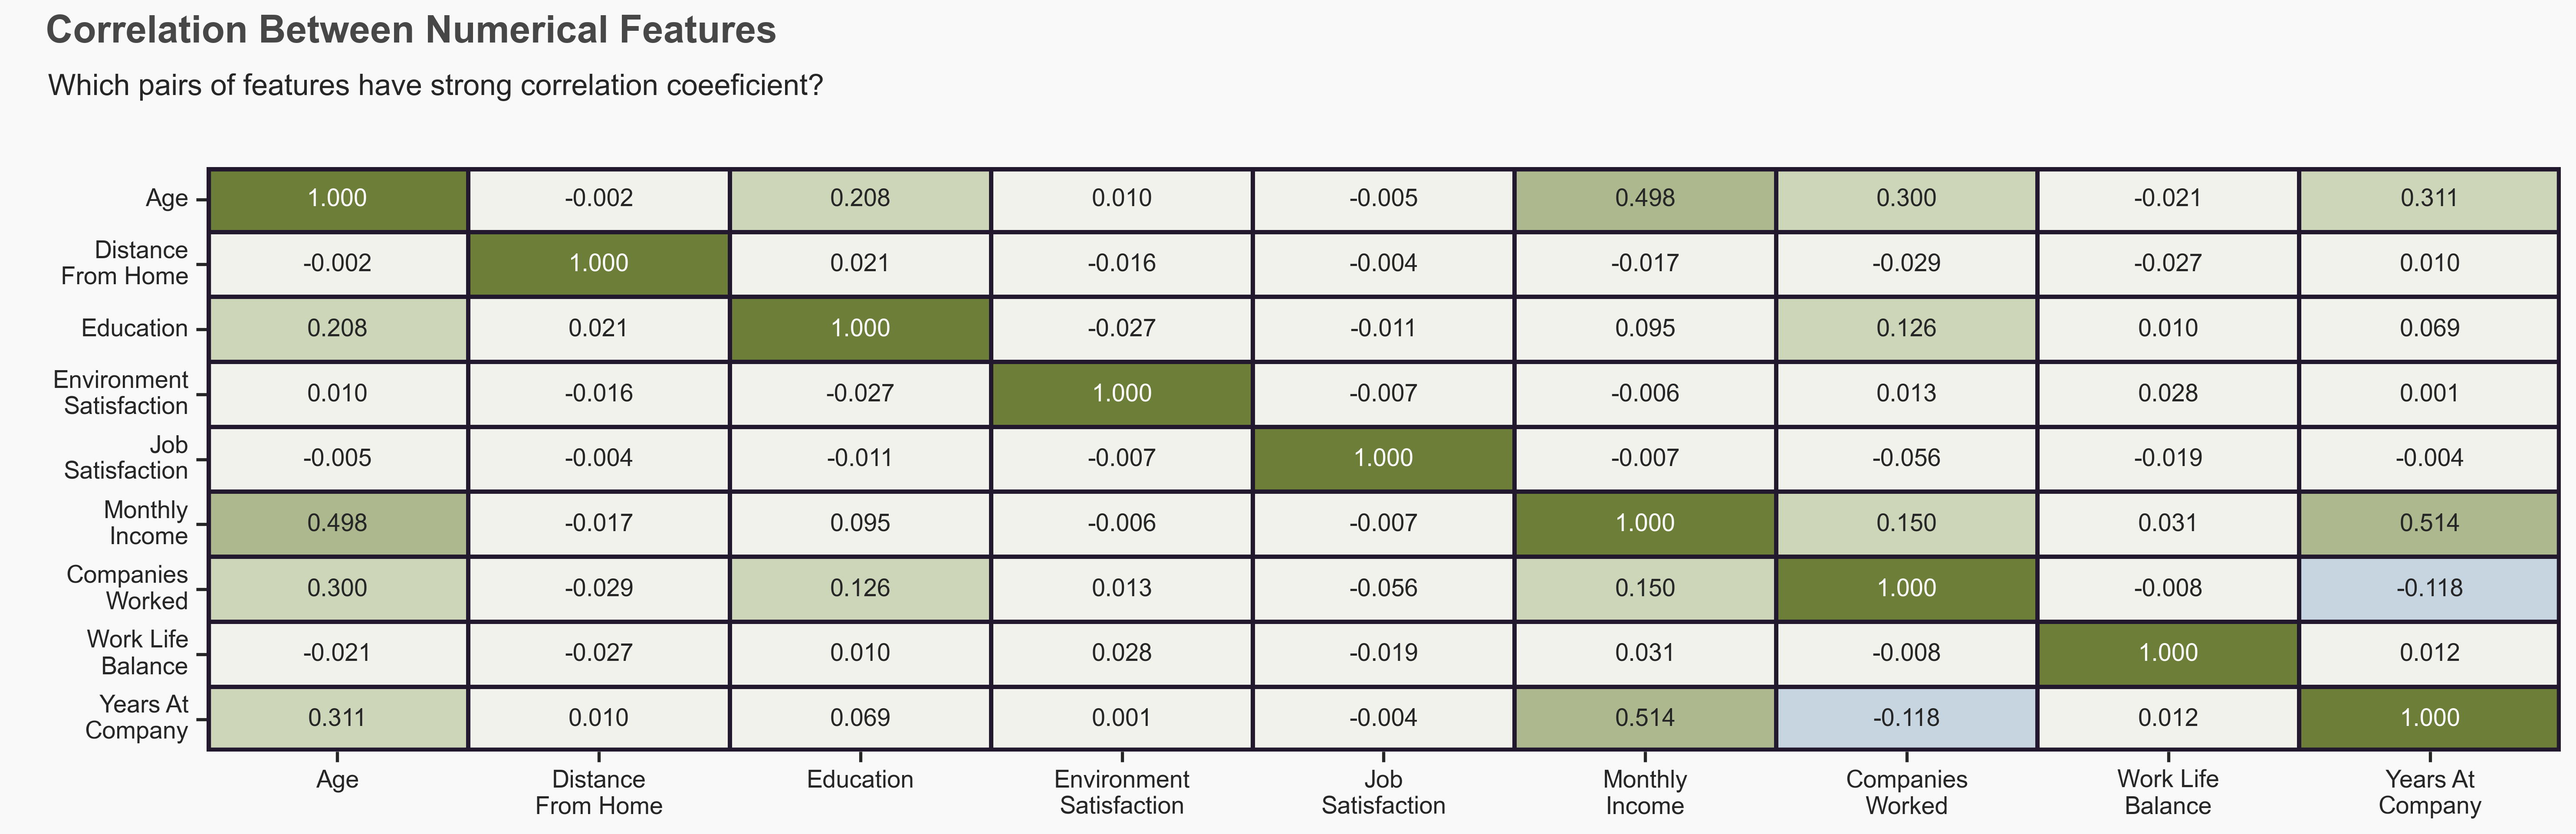

In [63]:
fig = plt.figure(figsize=(20, 5), dpi=350)

cmap = sns.diverging_palette(240, 100, n=9)

corr = df.select_dtypes(exclude="object").corr()
ax = sns.heatmap(corr, 
            annot=True, 
            linewidths=2, 
            linecolor=colors[0],
            fmt='.3f', 
            cmap=cmap,
            cbar=False,
            center=0,
            annot_kws={"fontsize":11.5}
            )

ax.tick_params(axis='both', which='major', labelsize=11.5, length=5, width=1.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')
ax.set_xticklabels(['Age', 'Distance\nFrom Home', 'Education', 'Environment\nSatisfaction',
                    'Job\nSatisfaction', 'Monthly\nIncome', 'Companies\nWorked',
                    'Work Life\nBalance', 'Years At\nCompany'])
ax.set_yticklabels(['Age', 'Distance\nFrom Home', 'Education', 'Environment\nSatisfaction',
                    'Job\nSatisfaction', 'Monthly\nIncome', 'Companies\nWorked',
                    'Work Life\nBalance', 'Years At\nCompany'])

ax.axhline(y=0, color=colors[0],linewidth=4)
ax.axhline(y=corr.shape[1], color=colors[0],linewidth=4)
ax.axvline(x=0, color=colors[0],linewidth=4)
ax.axvline(x=corr.shape[0], color=colors[0],linewidth=4)

# Title
fig.suptitle(t='Correlation Between Numerical Features', 
             x=0.072,
             y=1.08,
             ha="left",
             fontsize=18,
             fontweight="bold",
             color=title_color)

# Description
fig.text(0.062, 0.933,  
	'''
    Which pairs of features have strong correlation coeeficient?
    ''',
	fontsize=14, fontweight='light', ha="left")

plt.show()

### Correlation Between Numerical Features and Attrition

In [15]:
df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0})

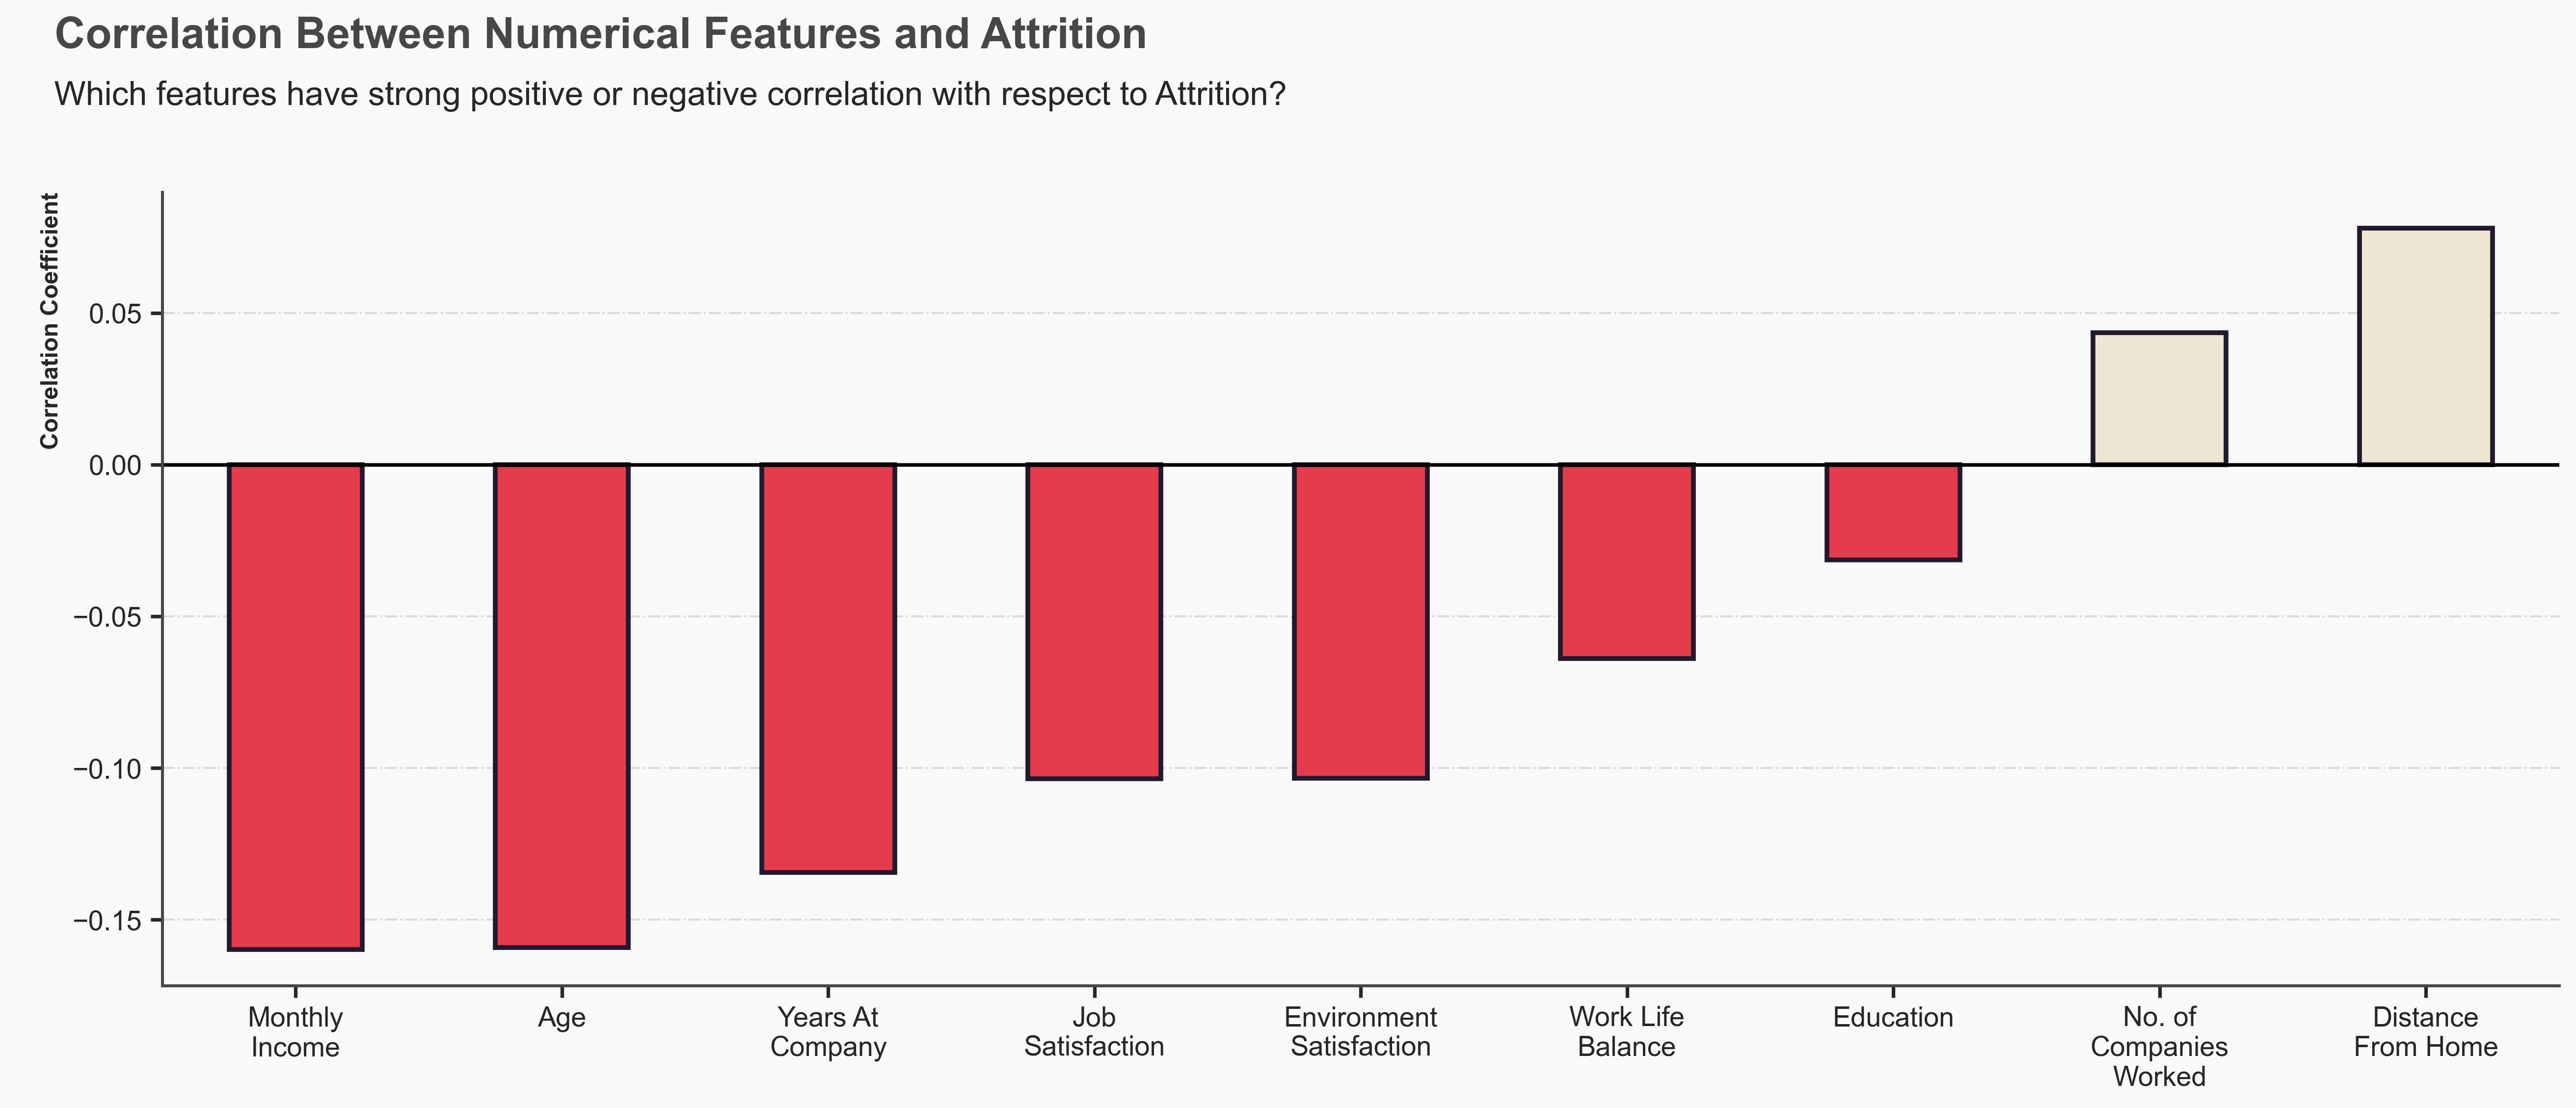

In [45]:
df_corr = df.select_dtypes(exclude="object").corr()["Attrition"].sort_values()[:-1]

fig, ax = plt.subplots(figsize=(18, 6), dpi=350)

sns.barplot(x=df_corr.index,
            y=df_corr.values, 
            width=0.5,
            palette=[colors[4],colors[4],colors[4],colors[4],colors[4],colors[4],colors[4],colors[3],colors[3]],
            saturation=1,
            linewidth=2,
            edgecolor = "#23192E"
            )
ax.grid(axis = 'y', which = "major", linestyle = "-.", alpha = 0.7)
ax.axhline(y=0, color="black", linestyle='-')

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
ax.set_xticklabels(['Monthly\nIncome', 'Age', 'Years At\nCompany','Job\nSatisfaction', 
                    'Environment\nSatisfaction', 'Work Life\nBalance', 'Education',
                    'No. of\nCompanies\nWorked', 'Distance\nFrom Home'])
ax.set_ylabel("Correlation Coefficient", loc="top", fontweight="semibold")
#ax.get_yaxis().set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=11.5, length=5, width=1.5)

# Title
fig.suptitle(t='Correlation Between Numerical Features and Attrition', 
             x=0.09,
             y=1.05,
             ha="left",
             fontsize=18,
             fontweight="bold",
             color=title_color)

# Description
fig.text(0.078, 0.93,  
	'''
    Which features have strong positive or negative correlation with respect to Attrition?
    ''',
	fontsize=14, fontweight='light', ha="left")

plt.show()